# Metrics and Plots for the trained models

This notebook aims to viz results from metrics that were already saved in `results/scores_tables`

> [!NOTE]  
> normalization only applied to create protein embeddings

## Viz

In [35]:
version='v2.10'
norm='minmax'

In [36]:
import pandas as pd
import sys,os
sys.path.append(os.path.abspath('../../src/ml'))


from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer



In [37]:
avg_df=pd.read_csv('../../results/score_tables/scores_avg_seeds.csv')
all_df=pd.read_csv('../../results/score_tables/scores_all_seeds.csv')

In [38]:
input_data=['Complex_protein_embeddings',
 'RGCN_protein_embeddings',
 'concatenated_protein_embeddings',
 'gene_expression'
 'Complex_sample_embeddings',
 'RGCN_sample_embeddings',
 'concatenated_sample_embeddings']

In [39]:
df=avg_df
filtered_results=df[((df['version']==version) | (df['input']=='gene_expression')) & (df['normalization']==norm)]
filtered_results = df[
    (
        (df['version'] == version) | (df['input'] == 'gene_expression')
    )
    & (
        (df['normalization'] == norm)
        | (
            (norm != 'none')
            & df['input'].isin([
                'RGCN_sample_embeddings',
                'Complex_sample_embeddings',
                'concatenated_sample_embeddings',
                'gene_expression'
            ])
        )
    )
]


For better foucsed results, consider only non pytorch mlp models and CompEx and RGCN only (the others gnns are not done yet)

So run this if metrics files contatin them

In [40]:
filtered_results=filtered_results[filtered_results['model']!='pytorch_mlp']
# -- only input in input_data
filtered_results=filtered_results[filtered_results['input'].isin(input_data)]

In [41]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
39,random_forest,Complex_protein_embeddings,minmax,v2.10,0.875837,0.938053,0.978947,0.957585,0.802802,0.978589,0.993864,0.064308
51,random_forest,RGCN_protein_embeddings,minmax,v2.10,0.620455,0.823355,0.950000,0.881402,0.335878,0.758014,0.902494,0.146610
59,random_forest,RGCN_sample_embeddings,none,v2.10,0.573325,0.805262,0.892105,0.845753,0.180593,0.645215,0.857944,0.174467
63,random_forest,concatenated_protein_embeddings,minmax,v2.10,0.877153,0.937938,0.981579,0.958884,0.809263,0.973206,0.992086,0.065920
71,random_forest,concatenated_sample_embeddings,none,v2.10,0.517464,0.781907,0.989474,0.873444,0.068934,0.562679,0.838127,0.181779
76,sklearn_mlp,Complex_protein_embeddings,minmax,v2.10,0.930383,0.967156,0.978947,0.972577,0.878588,0.983254,0.994725,0.038868
88,sklearn_mlp,RGCN_protein_embeddings,minmax,v2.10,0.497368,0.774555,0.994737,0.870913,-0.011099,0.497368,0.774605,0.228282
96,sklearn_mlp,RGCN_sample_embeddings,none,v2.10,0.493182,0.773039,0.950000,0.850738,-0.030902,0.491388,0.773064,0.253130
100,sklearn_mlp,concatenated_protein_embeddings,minmax,v2.10,0.499761,0.775792,0.963158,0.856796,-0.006841,0.499761,0.775451,0.240924
108,sklearn_mlp,concatenated_sample_embeddings,none,v2.10,0.487440,0.770797,0.965789,0.856959,-0.043415,0.487440,0.771214,0.250109


### 1. grouped bar plots

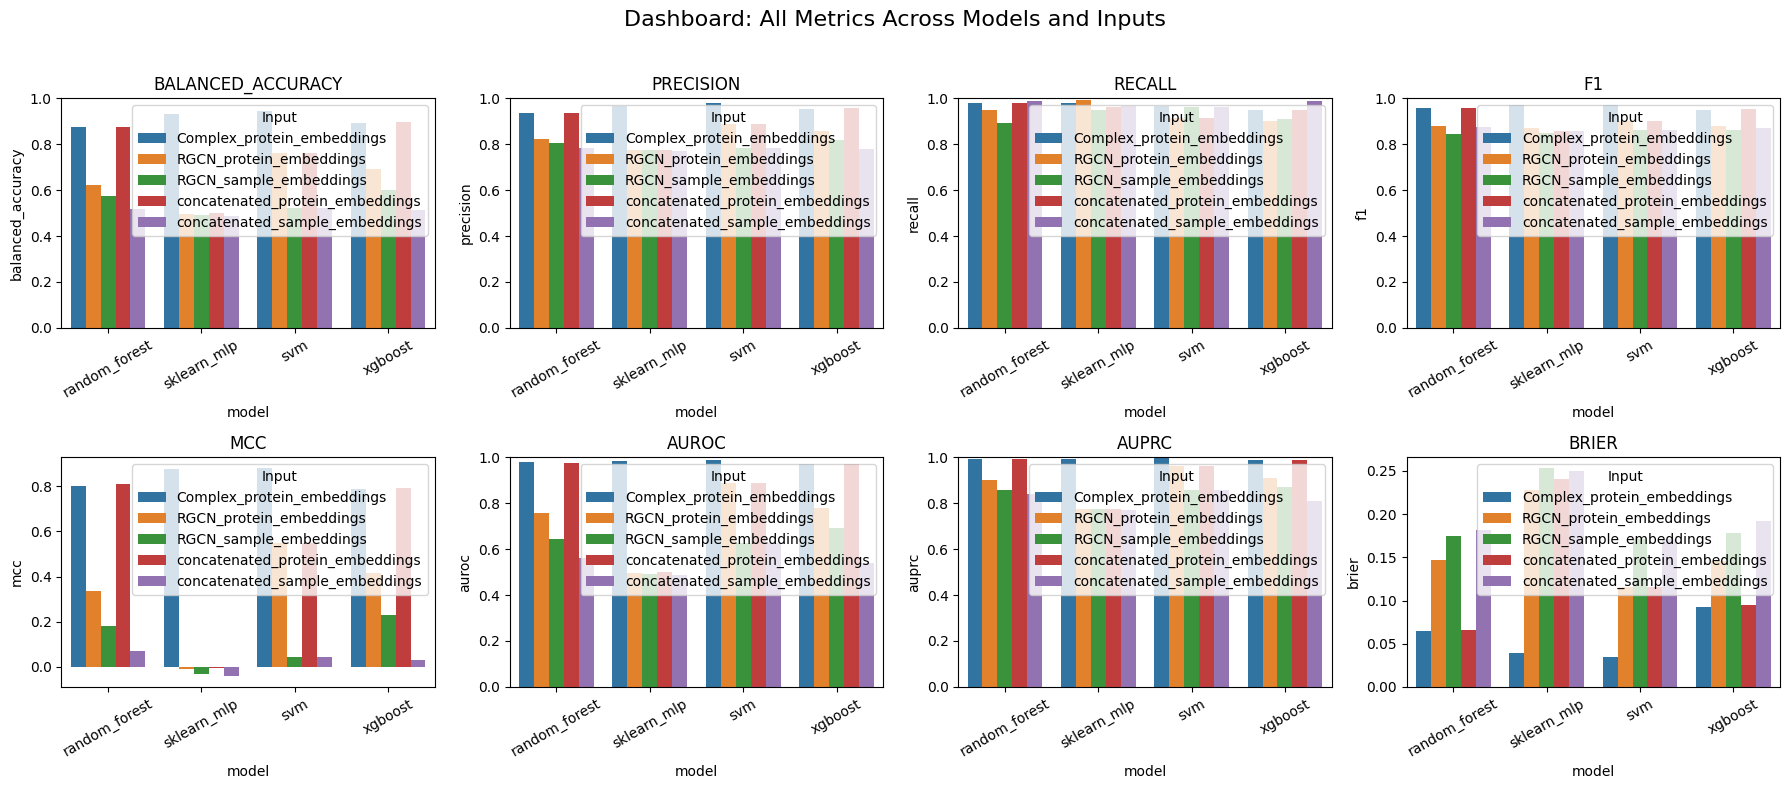

In [42]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()

### 2. heatmap

model_dataset x score matrix 

In [43]:
# metric='balanced_accuracy'

In [44]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
39,random_forest,Complex_protein_embeddings,minmax,v2.10,0.875837,0.938053,0.978947,0.957585,0.802802,0.978589,0.993864,0.064308
51,random_forest,RGCN_protein_embeddings,minmax,v2.10,0.620455,0.823355,0.950000,0.881402,0.335878,0.758014,0.902494,0.146610
59,random_forest,RGCN_sample_embeddings,none,v2.10,0.573325,0.805262,0.892105,0.845753,0.180593,0.645215,0.857944,0.174467
63,random_forest,concatenated_protein_embeddings,minmax,v2.10,0.877153,0.937938,0.981579,0.958884,0.809263,0.973206,0.992086,0.065920
71,random_forest,concatenated_sample_embeddings,none,v2.10,0.517464,0.781907,0.989474,0.873444,0.068934,0.562679,0.838127,0.181779
76,sklearn_mlp,Complex_protein_embeddings,minmax,v2.10,0.930383,0.967156,0.978947,0.972577,0.878588,0.983254,0.994725,0.038868
88,sklearn_mlp,RGCN_protein_embeddings,minmax,v2.10,0.497368,0.774555,0.994737,0.870913,-0.011099,0.497368,0.774605,0.228282
96,sklearn_mlp,RGCN_sample_embeddings,none,v2.10,0.493182,0.773039,0.950000,0.850738,-0.030902,0.491388,0.773064,0.253130
100,sklearn_mlp,concatenated_protein_embeddings,minmax,v2.10,0.499761,0.775792,0.963158,0.856796,-0.006841,0.499761,0.775451,0.240924
108,sklearn_mlp,concatenated_sample_embeddings,none,v2.10,0.487440,0.770797,0.965789,0.856959,-0.043415,0.487440,0.771214,0.250109


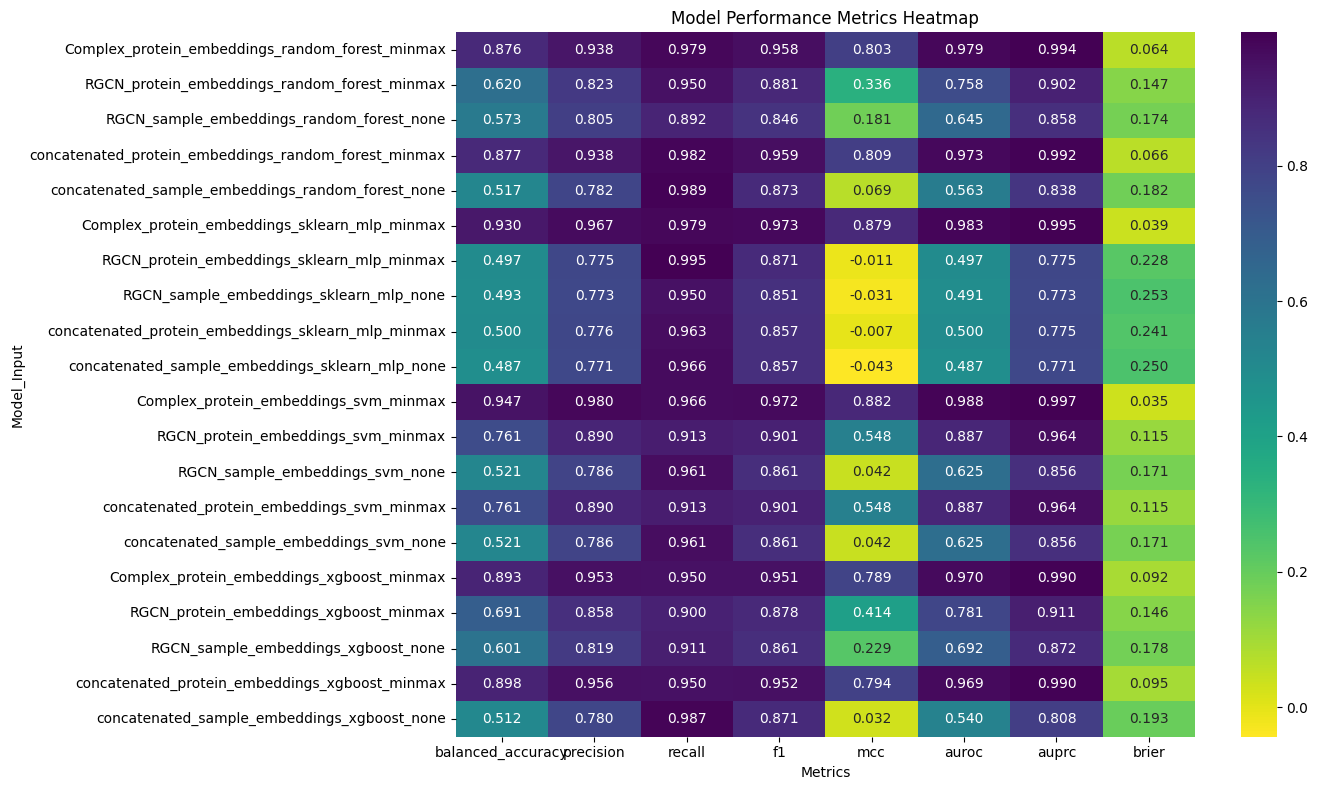

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc','auprc','brier']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results.set_index('model_input')[metrics]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 3. radar plot

To be more readbale better make a radar plot per model (one for svm, one for xgboost...)

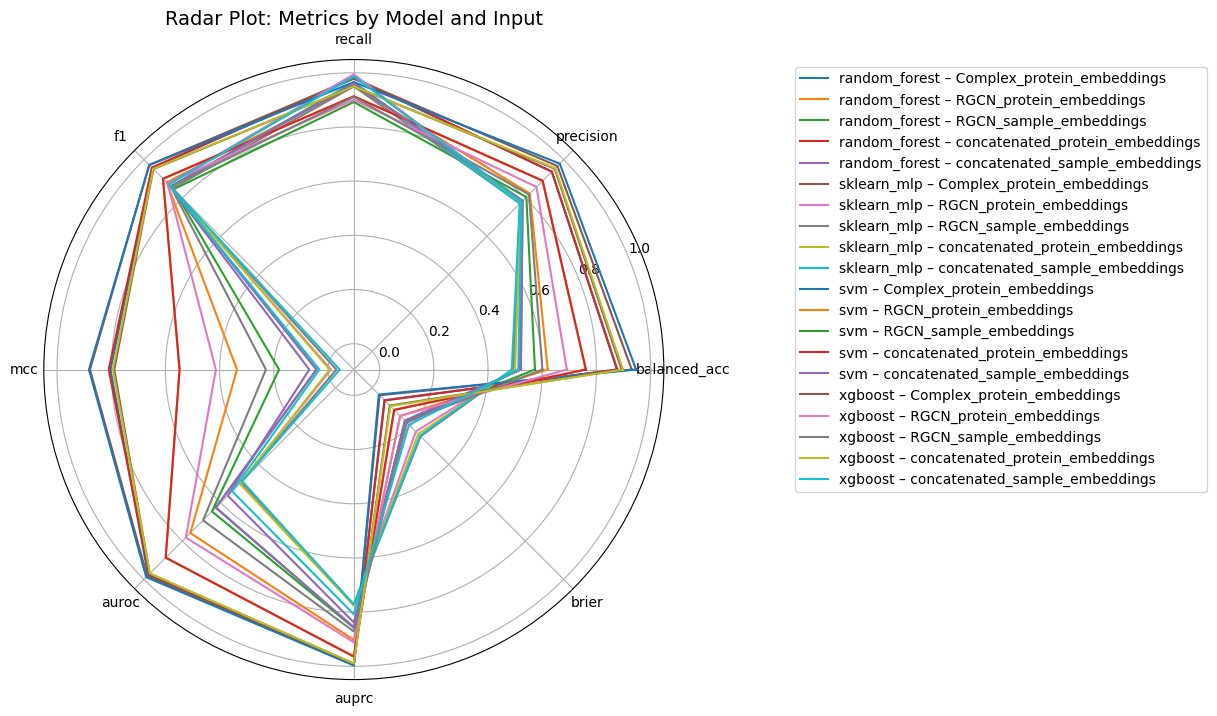

In [46]:
dashboard.plot_radar()

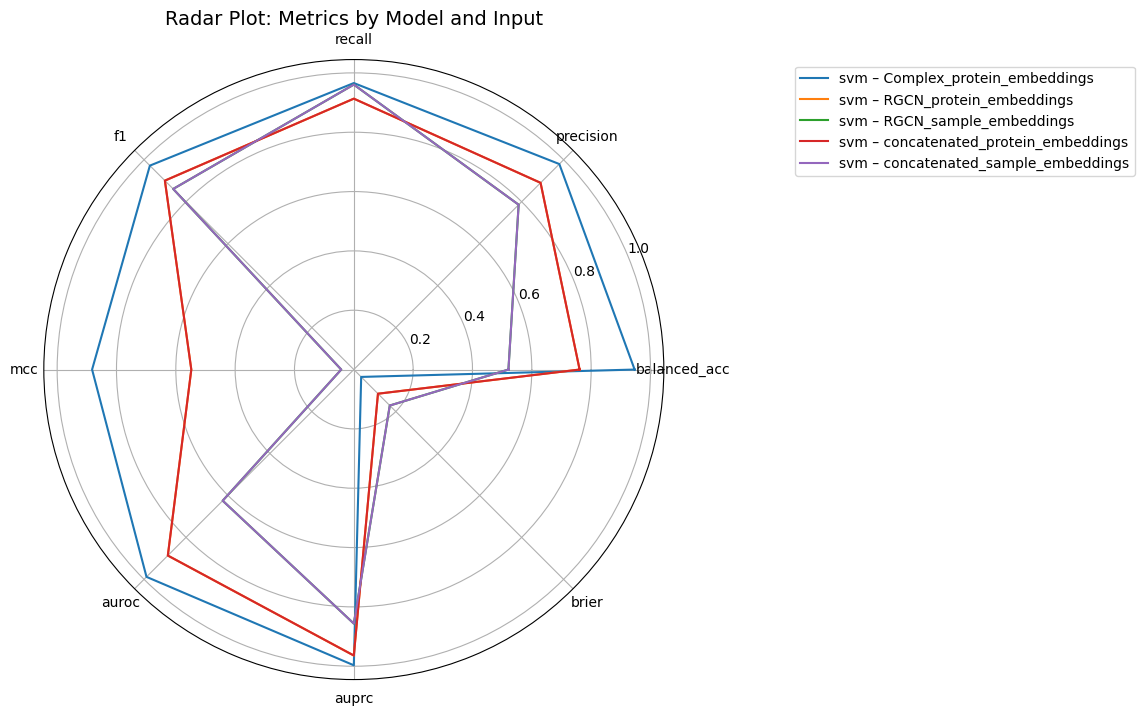

In [47]:
collector = ResultsCollector()
svm_filtered_results=filtered_results[filtered_results['model']=='svm']
dashboard = DashboardVisualizer(svm_filtered_results, collector)
dashboard.plot_radar()

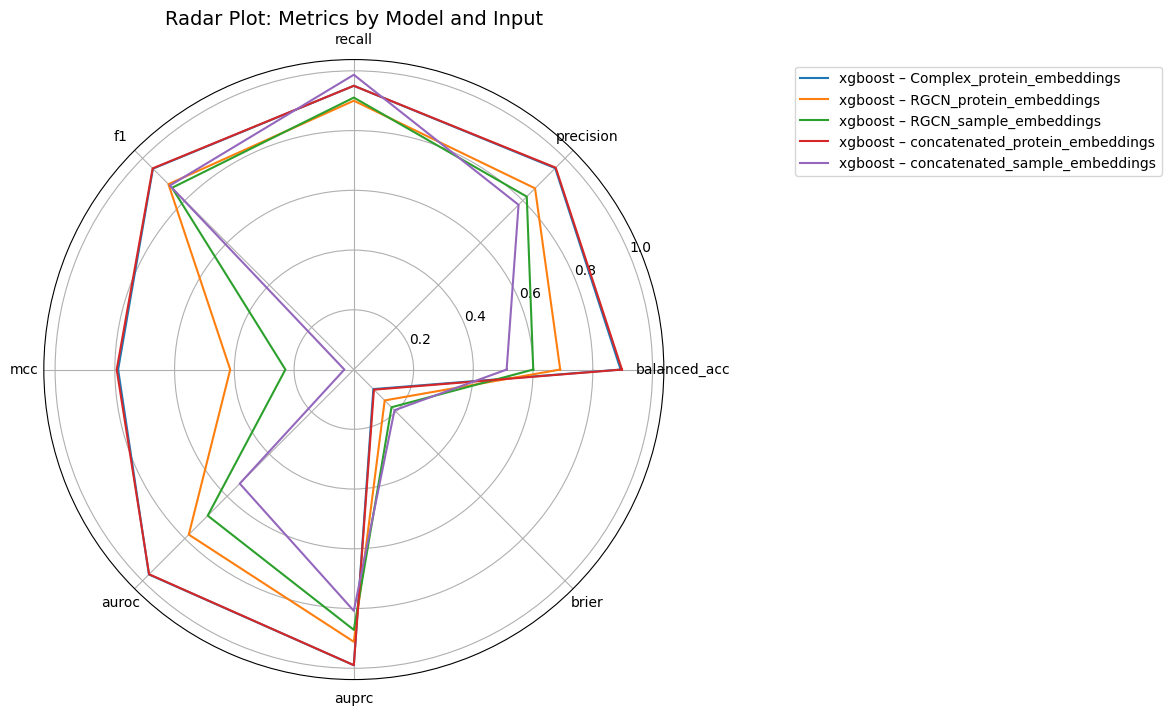

In [48]:
collector = ResultsCollector()
xgboost_filtered_results=filtered_results[filtered_results['model']=='xgboost']
dashboard = DashboardVisualizer(xgboost_filtered_results, collector)
dashboard.plot_radar()


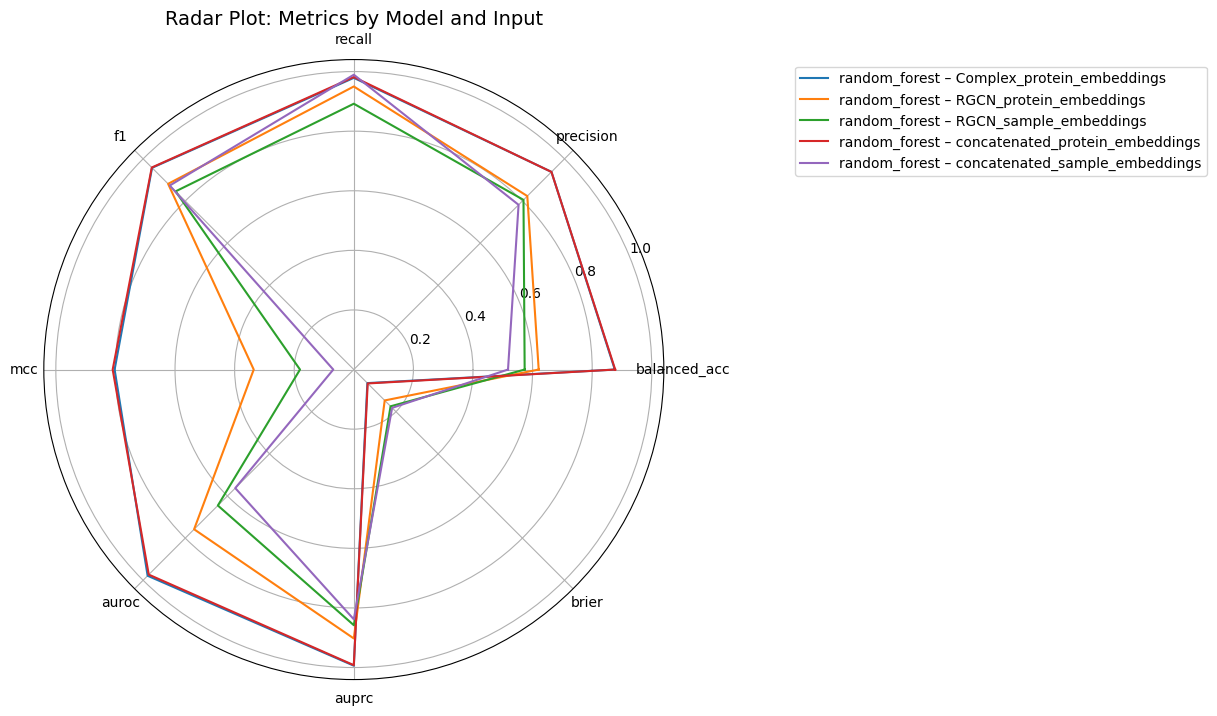

In [49]:
collector = ResultsCollector()
random_forest_filtered_results=filtered_results[filtered_results['model']=='random_forest']
dashboard = DashboardVisualizer(random_forest_filtered_results, collector)
dashboard.plot_radar()

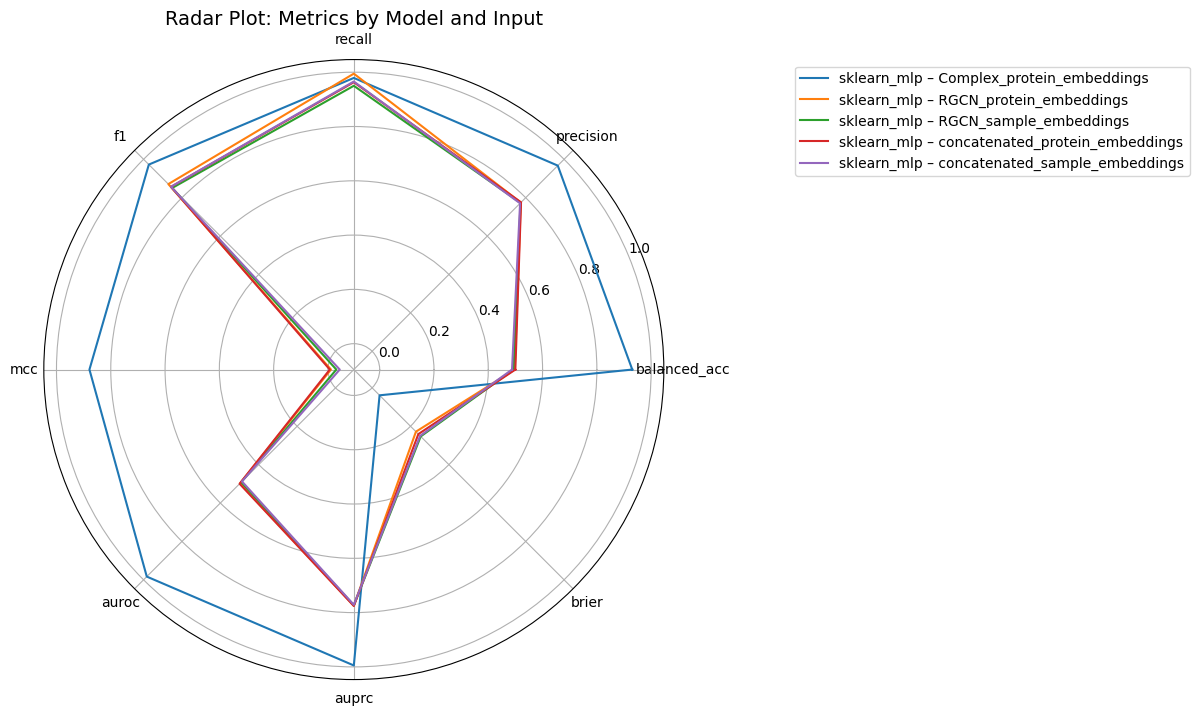

In [50]:
collector = ResultsCollector()
sklearn_mlp_filtered_results=filtered_results[filtered_results['model']=='sklearn_mlp']
dashboard = DashboardVisualizer(sklearn_mlp_filtered_results, collector)
dashboard.plot_radar()

/mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/src/ml/visualizer.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left')


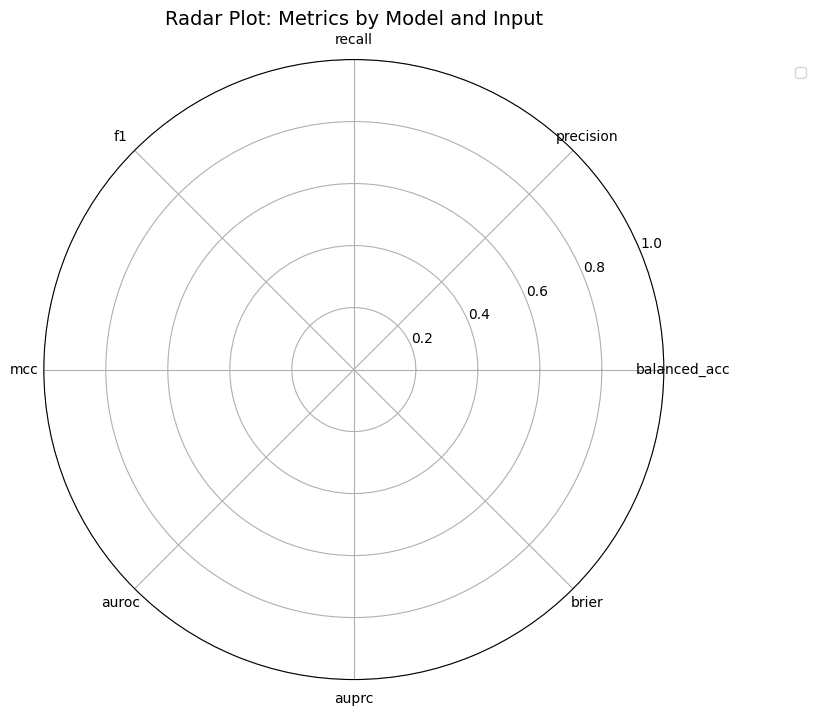

In [51]:
collector = ResultsCollector()
pytorch_mlp_filtered_results=filtered_results[filtered_results['model']=='pytorch_mlp']
dashboard = DashboardVisualizer(pytorch_mlp_filtered_results, collector)
dashboard.plot_radar()

### 5. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [52]:
metric='precision'

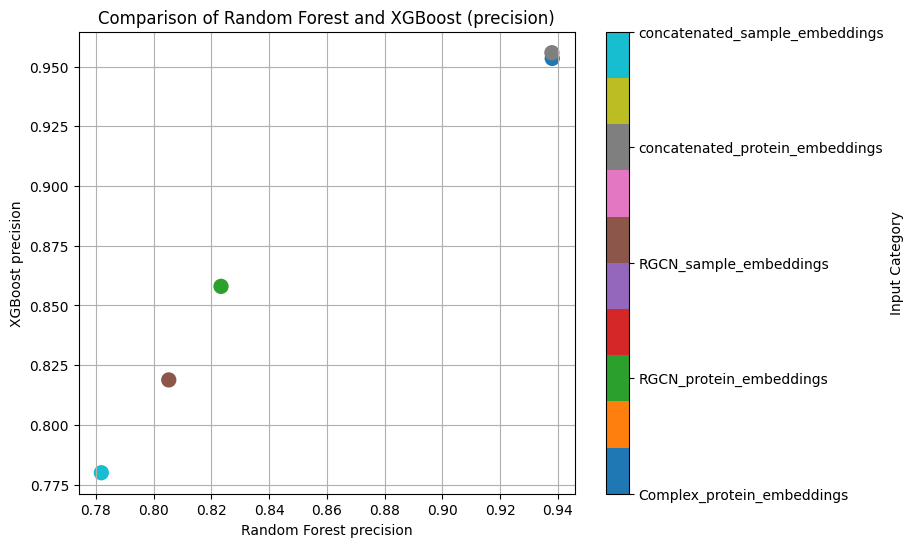

In [53]:
import matplotlib.pyplot as plt

rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', metric]]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', metric]]

merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_rf'],
    merged[metric + '_xgb'],
    s=100,
    c=merged['input'].astype('category').cat.codes,
    cmap='tab10'
)

plt.xlabel('Random Forest ' + metric)
plt.ylabel('XGBoost ' + metric)
plt.title('Comparison of Random Forest and XGBoost (' + metric + ')')
plt.grid()

cbar = plt.colorbar(scatter)
cbar.set_label('Input Category')
cbar.set_ticks(range(len(merged['input'].astype('category').cat.categories)))
cbar.set_ticklabels(merged['input'].astype('category').cat.categories)

plt.show()


### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [54]:
metric='balanced_accuracy'

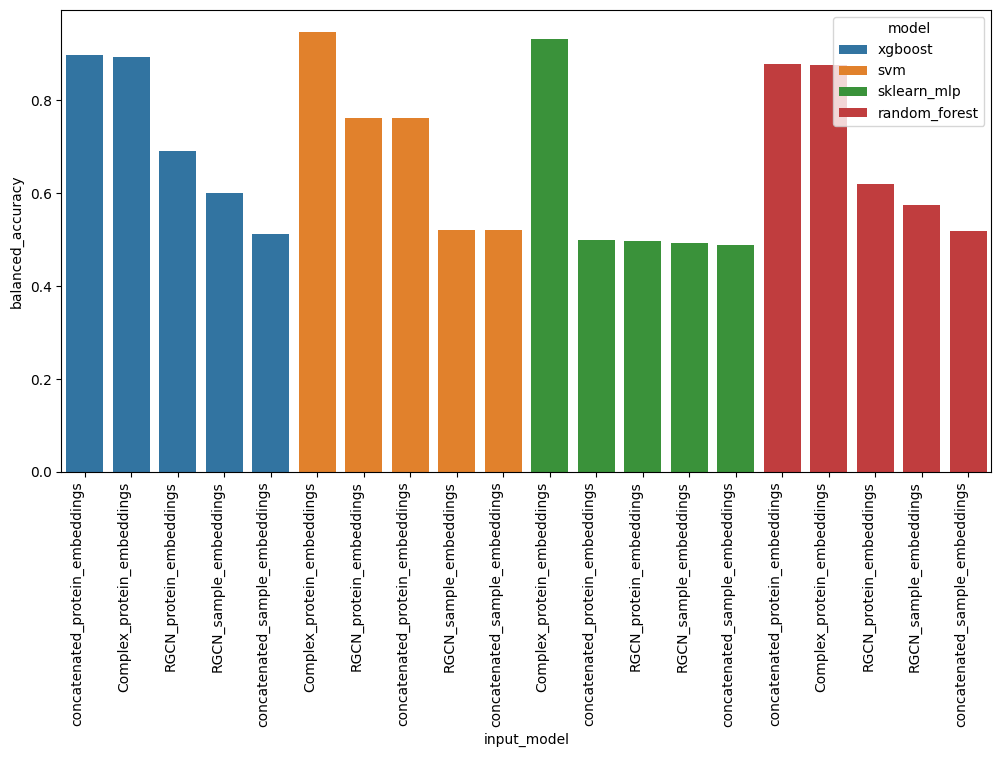

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()